# Final Project 
### Optimizing Inventory by Anticipating Error in Demand Forecast
Felix, Jack, Silvano
IMT 574

### Dataset - Synthetic Store Operations
[Kaggle Dataset](https://www.kaggle.com/datasets/anirudhchauhan/retail-store-inventory-forecasting-dataset?resource=download)


1. Describe the dataset you chose. Why did you choose it? What features does it include? What year is it from? How was it collected? What should we know about this dataset as we read your writeup? (8pts)

    **We are interested in trying to optimize supply chain operations through creating ideal prediction points to order products that keep stores in overstocked rather than understocked, potentially hurting sales.**

    **We chose this dataset because we were interested in the operations side of Data Science and this dataset is robust.**

    **This is a time-series dataset that looks at the following by the day:**
    - Store ID - Unique store IDs
    - Region - Geographic region of stores
    - Product ID - Unique product IDs
    - Product Type - categofies of product like Toys, Groceries, Clothing.
    - Inventory Level - Stock available at the beginning of the day
    - Units Sold - Units of stock sold during the day
    - Demand Forecast - Predicted demand based on past trends
    - Units Ordered - Units ordered to make up for inventory sold during the day
    - Price of Goods - Cost of items
    - Discount Amount - Percentage of discount given to a purchase
    - Weather Conditions - Daily weather impacting sales
    - Holiday/Promotions (boolean) - Boolean for promotions or holiday sales
    - Competitor Pricing - pricing of a similar store
    - Seasonality - What part of the year, Winter, Summer, Spring, or Fall the transaction took place.
   
    **Per the dataset's Kaggle home page the dataset was posted ~4 months ago in 2025. It was sythetically generated so we are not working with real-world data. This gives us freedom to use this data without much restriction.**
    

## Defining a Research Question

2. Define a research question. What are you trying to predict? Describe what you’re trying to accomplish (it will differ between Supervised and Unsupervised learning). (4pts)
    
    Research Question
-   **How can we optimize inventory levels for Store S001 in the East region by using the best supervised model out of ARIMA, Random Forest Ensemble method and XG Boost Regression?**

    **Initially, we wanted to simply predict inventory level and figure out the best model to forecast future levels so we could decide prediction points to strategically order items. We quickly realized there is already a "Demand Forecast" that comes with this data and pivoted to trying to predict the error of the demand vs sales. This would let us know if the dataset's built in predictions could be optimized to better adjust ordering and inventory levels.**

    **Overall, we are trying to accomplish creating a model that predicts the error of our predictions which will allow us, in the future, to adjust our demand forecast.**
    


3. Why is this algorithm a good way of answering your research question? (4pts)
    >   
        Hayes, A. (2010, April 11). Autoregressive integrated moving average (ARIMA) prediction model. Investopedia. https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp

    - **The [SARIMAX](https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html) model is a powerhouse when dealing with time-series data that has seasonality built in to it. It has the innate capability to analyze moving averages and incoporates this into its package. When we also trained XGBoost Forest Regressor model and a Random Forest model that did not perform as well as the SARIMAX model. Since our goal is to predict the periodicity of ordering for a particular store, we would want a model that can identify cyclic patterns.** 

    **The XGBRFRegressor had an RMSE of 4.39, a MAE of 3.41, but was not able to explain any of the variance within the model as it had an R2 of 0.00.**

The code below is commented out, but is for the XGBoost model and Random Forest model we tried during model selection.

In [6]:
# # XGBoost Model for Residual Sales Prediction
# # Imports
# import pandas as pd
# import numpy as np
# import xgboost as xgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import matplotlib.pyplot as plt
# import seaborn as sns

# pd.options.mode.copy_on_write = True

# ## 1. Data Loading and Initial Exploration
# # Load the retail data
# df = pd.read_csv('retail.csv')

# # Display basic information about the dataset
# print("Dataset shape:", df.shape)
# df.head()


# # Check data types and missing values
# df.info()
# df.isnull().sum()


# ## 2. Feature Engineering
# # Convert date to datetime format
# df['Date'] = pd.to_datetime(df['Date'])
# print(type(df['Date'][0]))
# # Calculate the residual (Units Sold - Demand Forecast)
# df['Residual_Sales'] = df['Units Sold'] - df['Demand Forecast']
# df.head()
# # Select for store 1, drop unecessary columns
# df.drop(columns=['Product ID', 'Category', 'Weather Condition', 'Competitor Pricing', 'Seasonality'], inplace=True)
# # Show head of new df
# df.head()
# # filter df for Store 1 and East region
# df_new = df[(df['Store ID']=='S001') & (df['Region']=='East')]
# df_new.head()
# # Now we drop 'Region' and 'Store ID' then groupby date to get appropriate sums
# df_new.drop(columns=['Store ID', 'Region'], inplace=True)

# df_group = df_new.groupby('Date').mean()
# df_group.head()
# # Get features to help XGBoost with a timeseries prediction
# df_group.reset_index(inplace=True)
# df_group['Year'] = df_group['Date'].dt.year
# df_group['Month'] = df_group['Date'].dt.month
# df_group['Day'] = df_group['Date'].dt.day
# df_group['DayOfWeek'] = df_group['Date'].dt.dayofweek
# df_group.head()
# # Display the distribution of residual sales
# plt.figure(figsize=(10, 6))
# sns.histplot(df_group['Residual_Sales'], kde=True)
# plt.title('Distribution of Residual Sales per Day')
# plt.xlabel('Residual Sales (Units Sold - Demand Forecast)')
# plt.ylabel('Frequency')
# plt.show()
# ## 3. Feature Preparation
# df_group.set_index('Date', inplace=True)
# # Define features for the model
# columns = [
#     # Numerical features - take out sales and demand forecast
#     'Inventory Level', 
#     'Price', 'Discount', 'Holiday/Promotion', 
#     'Month', 'Day', 'DayOfWeek'
# ]

# X = df_group[columns]
# y = df_group['Residual_Sales']
# X
# # Split by 80% and 20% 
# trainin = int(round(0.8*len(X),0))

# X_train = X[:trainin]
# y_train = y[:trainin]
# X_test = X[trainin+1:]
# y_test = y[trainin+1:]
# # 5. XGBoost Model Training
# # Initialize XGBoost regressor - used Claud AI to get the initial parameters
# # xgb_model = xgb.XGBRegressor(
# #     objective='reg:squarederror',
# #     n_estimators=100,
# #     max_depth=6,
# #     learning_rate=0.1,
# #     subsample=0.8,
# #     colsample_bytree=0.8,
# #     random_state=42
# # )
# from xgboost import XGBRFRegressor

# xgb_model = XGBRFRegressor(
#     n_estimators=10,
#     max_depth=6,
#     learning_rate=3,
#     subsample=0.8,
#     colsample_bynode=0.8,
#     reg_lambda=1.0,
#     random_state=42
# )

# # Train the model
# xgb_model.fit(X_train, y_train)

# ## 6. Feature Importance Analysis

# # Plot feature importance
# plt.figure(figsize=(12, 8))
# xgb.plot_importance(xgb_model, max_num_features=15, height=0.8)
# plt.title('XGBoost Feature Importance')
# plt.show()

# ## 7. Make Predictions
# y_pred = xgb_model.predict(X_test)


# # Preview predictions vs actual
# results_df = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred,
#     'Error': y_test - y_pred
# })
# results_df

# # Plot the Actual vs Predicted
# plt.figure(figsize=(10, 6))
# sns.lineplot(results_df[['Actual', 'Predicted']])
# plt.title('Actual vs Predicted Resdidual of Sales Per Day - Demand Forecast for Store S001 and East Region')
# plt.xlabel('Residual Sales (Units Sold - Demand Forecast)')
# plt.ylabel('Residual')
# plt.show()
# # Calculate rmse and f-1 score for final model
# # get metrics of model
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# # show metrics
# metrics_df = pd.DataFrame([rmse, mae, r2], columns=['Metrics'], index=['RMSE','MAE', 'R2']).round(2)

# metrics_df
# from sklearn.model_selection import GridSearchCV

# # use grid search CV to perform hyper parameter tuning

# params = {
#     'max_depth': [3, 4, 5, 6, 7, 8, 9],
#     'learning_rate': [0.01, 0.03, 0.6, .1],
# }

# grid_search = GridSearchCV(
#     estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
#     param_grid=params,
#     scoring='neg_mean_squared_error',
#     cv=3, # use 3 fold cross validation
#     verbose=1
# )




# # Perform grid search on two parameters max depth and learning rate and assign to variable best model
# best_model = grid_search.fit(X_train, y_train).best_estimator_


# # get predictions
# y_pred_best = best_model.predict(X_test)



# # Calculate rmse and f-1 score for final best model
# # get metrics of model
# rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
# mae = mean_absolute_error(y_test, y_pred_best)
# r2 = r2_score(y_test, y_pred_best)

# # show metrics
# metrics_df = pd.DataFrame([rmse, mae, r2], columns=['Metrics'], index=['RMSE','MAE', 'R2']).round(2)

# metrics_df

# # Preview predictions vs actual for best model
# results_best = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred_best
# })

# # Plot the Actual vs Predicted for best model
# plt.figure(figsize=(10, 6))
# sns.lineplot(results_best[['Actual', 'Predicted']])
# plt.title('Actual vs Predicted Resdidual of Sales Per Day - Demand Forecast for Store S001 and East Region')
# plt.xlabel('Residual Sales (Units Sold - Demand Forecast)')
# plt.ylabel('Residual')
# plt.show()

In [7]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.model_selection import GridSearchCV
# df = pd.read_csv("retail_store_inventory.csv")
# df.info(), df.head()
# df.isna().sum()
# df.duplicated().sum()
# print(df['Store ID'].unique())   # Check unique stores
# print(df['Product ID'].unique()) # Check unique products
# print(df['Region'].unique())  # Check unique regions
# plt.figure(figsize=(10, 5))
# sns.countplot(data=df, x='Region', hue='Store ID')
# plt.title('Number of Stores per Region')
# plt.show()
# df.groupby('Product ID')['Units Sold'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12,5))
# plt.title('Total Sales per Product')
# plt.xlabel('Product')
# plt.ylabel('Total Units Sold')
# plt.show()
# sns.boxplot(data=df, x='Store ID', y='Units Sold')
# plt.title('Sales Distribution Across Stores')
# plt.show()
# plt.figure(figsize=(10, 5))
# plt.hist(df['Units Sold'], bins=20, edgecolor='black')
# plt.title('Distribution of Units Sold')
# plt.xlabel('Units Sold')
# plt.ylabel('Frequency')
# plt.show()
# import seaborn as sns
# numarical_columns = ['Inventory Level','Units Sold','Units Ordered','Price','Discount','Competitor Pricing','Holiday/Promotion','Demand Forecast']

# corr_matrix = df[numarical_columns].corr()

# plt.figure(figsize=(8,4))

# sns.heatmap(corr_matrix, annot=True)

# plt.show()
# #convert data to datetime
# df['Date']= pd.to_datetime(df['Date'])
# daily_sales = df.groupby('Date')[['Units Sold', 'Demand Forecast']].sum().reset_index()

# # Plot daily sales
# plt.figure(figsize=(15, 6))
# plt.plot(daily_sales['Date'], daily_sales['Units Sold'], label='Units Sold')
# plt.plot(daily_sales['Date'], daily_sales['Demand Forecast'], label='Demand Forecast')   
# plt.title('Time series plot of daily sales')
# plt.xlabel('Date')
# plt.ylabel('Units Sold')
# plt.legend()
# plt.show()
# <font size="5">After Some EDAs and data visualization, we found that there isn't distinguishable difference in sales in products, stores, and region. Therefore, we are just focusing on all products in Store 1 and East Region. We are converting categorical variable into numerical variable using One Hot Encoding</font>  also, explain here what variable we are using
# filtered_df = pd.get_dummies(df, columns=['Weather Condition', 'Seasonality'], drop_first=True)
# print(filtered_df.columns)
# filtered_df[['Weather Condition_Rainy','Weather Condition_Snowy', 'Weather Condition_Sunny',
#             'Seasonality_Spring', 'Seasonality_Summer', 'Seasonality_Winter']] = filtered_df[[
#                 'Weather Condition_Rainy','Weather Condition_Snowy', 'Weather Condition_Sunny',
#                 'Seasonality_Spring', 'Seasonality_Summer', 
#                 'Seasonality_Winter'
#             ]].astype(int)

# filtered_df.head()
# #  Filter the data for the specified Store ID and Region
# store_filter = (filtered_df["Store ID"] == "S001") & (filtered_df["Region"] == "East") & (filtered_df["Category"] == "Clothing")
# filtered_df = filtered_df[store_filter]
# filtered_df.head()
# # Columns you want to drop
# columns_to_drop = [
#     "Store ID",
#     "Product ID",
#     "Category",
#     "Region"
# ]

# filtered_df = filtered_df.drop(columns=columns_to_drop, errors='ignore')
# filtered_df.head()
# # Aggregate explicitly by 'Date' column
# filtered_df = filtered_df.groupby('Date').agg({
#     'Inventory Level': 'mean',
#     'Units Sold': 'sum',
#     'Units Ordered': 'sum',
#     'Demand Forecast': 'sum',
#     'Price': 'mean',
#     'Discount': 'mean',
#     'Holiday/Promotion': 'mean',
#     'Competitor Pricing': 'mean',
#     'Weather Condition_Rainy': 'mean',
#     'Weather Condition_Snowy': 'mean',
#     'Weather Condition_Sunny': 'mean',
#     'Seasonality_Spring': 'mean',
#     'Seasonality_Summer': 'mean',
#     'Seasonality_Winter': 'mean'
# })  

# filtered_df.head()
# filtered_df = filtered_df.resample('D').sum().fillna(0)
# filtered_df.head()
# filtered_df['Demand Error'] = filtered_df['Units Sold'] - filtered_df['Demand Forecast']
# columns_to_drop = [
#     "Units Sold",
#     "Demand Forecast"
# ]
# filtered_df = filtered_df.drop(columns=columns_to_drop, errors='ignore')
# filtered_df.head()
# train_size = int(len(filtered_df) * 0.8)

# train_df = filtered_df.iloc[:train_size]
# test_df = filtered_df.iloc[train_size:]

# # Target variable
# y_train = train_df['Demand Error']
# y_test = test_df['Demand Error']

# #Adding noise to reduce overfitting
# #noise_std = 0.01 * np.std(y_train)
# #y_train_noisy = y_train + np.random.normal(0, noise_std, size=y_train.shape)

# # Exogenous variables
# exog_cols = ['Inventory Level', 
#               'Price', 'Discount', 'Holiday/Promotion',
#               'Competitor Pricing', 'Weather Condition_Rainy',
#               'Weather Condition_Snowy', 'Weather Condition_Sunny',
#               'Seasonality_Spring', 'Seasonality_Summer','Seasonality_Winter']

# train_exog = train_df[exog_cols]
# test_exog = test_df[exog_cols]
# grid_search = GridSearchCV(RandomForestRegressor(),
#                            param_grid=param_grid)
# grid_search.fit(train_exog, y_train_noisy)
# print(grid_search.best_estimator_)
# # Make predictions on the test set
# y_pred = best_rf.predict(test_exog)

# # Evaluate performance
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Test MAE: {mae:.2f}")
# print(f"Test MSE: {mse:.2f}")
# print(f"Test R² Score: {r2:.2f}")
# plt.figure(figsize=(10,5))
# plt.plot(y_test.index, y_test, label="Actual Demand Error", color="blue")
# plt.plot(y_test.index, y_pred, label="Random Forest Forecast", color="red", linestyle="dashed")
# plt.title("Actual vs Forecasted Demand Error (Random Forest)")
# plt.legend()
# plt.show()

4. Using the data you chose and the algorithm you chose, read in your data and run your model. (10pts)


In [8]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
import itertools
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")


In [9]:
print()

In [10]:
# Load the dataset
df = pd.read_csv('retail.csv')
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Display first few rows and basic info
print("Dataset Preview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Preview:
        Date Store ID Product ID     Category Region  Inventory Level  \
0 2022-01-01     S001      P0001    Groceries  North              231   
1 2022-01-01     S001      P0002         Toys  South              204   
2 2022-01-01     S001      P0003         Toys   West              102   
3 2022-01-01     S001      P0004         Toys  North              469   
4 2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0             Rainy                  0               29.69      Autumn  
1

In [11]:
# Count unique values for 'Weather Condition'
weather_counts = df['Weather Condition'].value_counts()
print("Weather Condition Counts:")
print(weather_counts)

# Count unique values for 'Seasonality'
seasonality_counts = df['Seasonality'].value_counts()
print("\nSeasonality Counts:")
print(seasonality_counts)

Category_counts = df['Category'].value_counts()
print("\nSeasonality Counts:")
print(Category_counts)


Weather Condition Counts:
Weather Condition
Sunny     18290
Rainy     18278
Snowy     18272
Cloudy    18260
Name: count, dtype: int64

Seasonality Counts:
Seasonality
Spring    18317
Summer    18305
Winter    18285
Autumn    18193
Name: count, dtype: int64

Seasonality Counts:
Category
Furniture      14699
Toys           14643
Clothing       14626
Groceries      14611
Electronics    14521
Name: count, dtype: int64


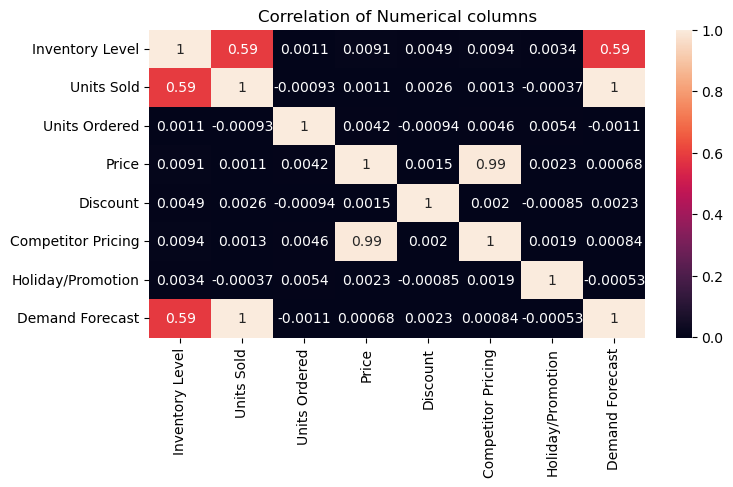

In [12]:
numarical_columns = ['Inventory Level','Units Sold','Units Ordered','Price','Discount','Competitor Pricing','Holiday/Promotion','Demand Forecast']

corr_matrix = df[numarical_columns].corr()

plt.figure(figsize=(8,4))

sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation of Numerical columns")
plt.show()

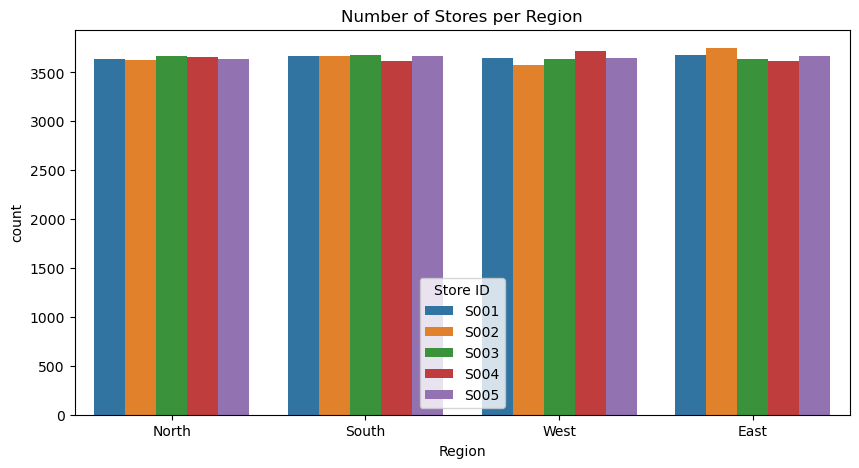

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Region', hue='Store ID')
plt.title('Number of Stores per Region')
plt.show()

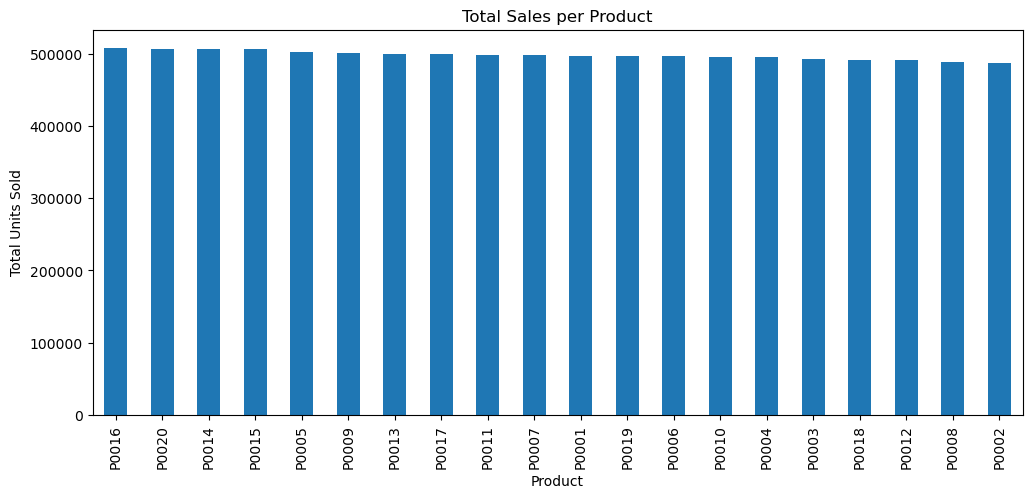

In [14]:
df.groupby('Product ID')['Units Sold'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12,5))
plt.title('Total Sales per Product')
plt.xlabel('Product')
plt.ylabel('Total Units Sold')
plt.show()

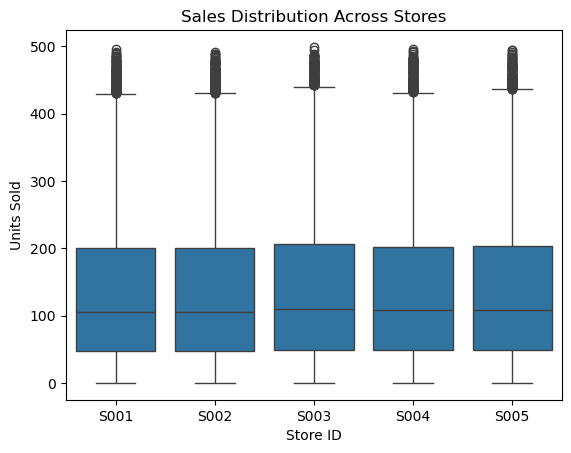

In [15]:
sns.boxplot(data=df, x='Store ID', y='Units Sold')
plt.title('Sales Distribution Across Stores')
plt.show()

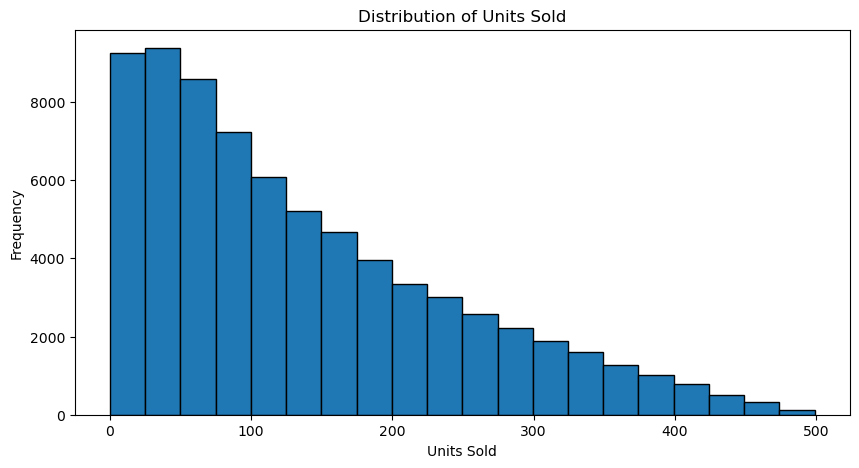

In [16]:
plt.figure(figsize=(10, 5))
plt.hist(df['Units Sold'], bins=20, edgecolor='black')
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()

It lloks like price and competitor pricing are highly correlated and we will drop them later. The Units sold and demand forecast will also be dropped after we calculate the residual.

Use one-hot encoding to convert categorical predictors

In [17]:
# Encode categorical columns first
filtered_df = pd.get_dummies(df, columns=['Weather Condition', 'Seasonality'], drop_first=True)

# Verify your column names exactly as generated by pandas
print(filtered_df.columns)


Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Holiday/Promotion', 'Competitor Pricing',
       'Weather Condition_Rainy', 'Weather Condition_Snowy',
       'Weather Condition_Sunny', 'Seasonality_Spring', 'Seasonality_Summer',
       'Seasonality_Winter'],
      dtype='object')


In [18]:
filtered_df[['Weather Condition_Rainy','Weather Condition_Snowy', 'Weather Condition_Sunny',
            'Seasonality_Spring', 'Seasonality_Summer', 'Seasonality_Winter']] = filtered_df[[
                'Weather Condition_Rainy','Weather Condition_Snowy', 'Weather Condition_Sunny',
                'Seasonality_Spring', 'Seasonality_Summer', 
                'Seasonality_Winter'
            ]].astype(int)

filtered_df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,0,29.69,1,0,0,0,0,0
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,0,66.16,0,0,1,0,0,0
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,1,31.32,0,0,1,0,1,0
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,1,34.74,0,0,0,0,0,0
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,0,68.95,0,0,1,0,1,0


In [19]:
#  Filter the data for the specified Store ID and Region
store_filter = (filtered_df["Store ID"] == "S001") & (filtered_df["Region"] == "East") & (filtered_df["Category"] == "Clothing")
filtered_df = filtered_df[store_filter]
filtered_df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
18,2022-01-01,S001,P0019,Clothing,East,352,257,186,267.38,73.28,10,0,77.26,0,0,0,0,0,1
107,2022-01-02,S001,P0008,Clothing,East,92,74,121,67.04,58.89,5,0,61.56,0,0,0,0,0,0
201,2022-01-03,S001,P0002,Clothing,East,282,199,70,193.26,54.02,0,0,52.91,0,0,0,1,0,0
211,2022-01-03,S001,P0012,Clothing,East,72,2,62,9.81,86.93,15,0,83.11,0,0,0,0,1,0
215,2022-01-03,S001,P0016,Clothing,East,148,31,160,35.11,93.61,15,1,94.15,0,1,0,1,0,0


In [20]:
# Columns you want to drop
columns_to_drop = [
    "Store ID",
    "Product ID",
    "Category",
    "Region",
    "Competitor Pricing"
]

filtered_df = filtered_df.drop(columns=columns_to_drop, errors='ignore')
filtered_df.head()

,Date,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
18,2022-01-01,352,257,186,267.38,73.28,10,0,0,0,0,0,0,1
107,2022-01-02,92,74,121,67.04,58.89,5,0,0,0,0,0,0,0
201,2022-01-03,282,199,70,193.26,54.02,0,0,0,0,0,1,0,0
211,2022-01-03,72,2,62,9.81,86.93,15,0,0,0,0,0,1,0
215,2022-01-03,148,31,160,35.11,93.61,15,1,0,1,0,1,0,0


In [21]:
# Aggregate explicitly by 'Date' column
filtered_df = filtered_df.groupby('Date').agg({
    'Inventory Level': 'mean',
    'Units Sold': 'sum',
    'Units Ordered': 'sum',
    'Demand Forecast': 'sum',
    'Price': 'mean',
    'Discount': 'mean',
    'Holiday/Promotion': 'mean',
    'Weather Condition_Rainy': 'mean',
    'Weather Condition_Snowy': 'mean',
    'Weather Condition_Sunny': 'mean',
    'Seasonality_Spring': 'mean',
    'Seasonality_Summer': 'mean',
    'Seasonality_Winter': 'mean'
})  

filtered_df.head()


,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
Date,,,,,,,,,,,,,
2022-01-01,352.000000,257,186,267.38,73.280000,10.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.0
2022-01-02,92.000000,74,121,67.04,58.890000,5.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
2022-01-03,167.333333,232,292,238.18,78.186667,10.0,0.333333,0.0,0.333333,0.0,0.666667,0.333333,0.0
2022-01-04,77.000000,7,76,22.66,98.280000,15.0,1.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0
2022-01-06,342.500000,526,307,524.67,31.030000,12.5,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.5


In [22]:
filtered_df = filtered_df.resample('D').sum().fillna(0)
filtered_df.head()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
Date,,,,,,,,,,,,,
2022-01-01,352.000000,257,186,267.38,73.280000,10.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.0
2022-01-02,92.000000,74,121,67.04,58.890000,5.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
2022-01-03,167.333333,232,292,238.18,78.186667,10.0,0.333333,0.0,0.333333,0.0,0.666667,0.333333,0.0
2022-01-04,77.000000,7,76,22.66,98.280000,15.0,1.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0
2022-01-05,0.000000,0,0,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0


Create column of 'Demand Error', which is what we are aiming to predict.

In [23]:
filtered_df['Demand Error'] = filtered_df['Units Sold'] - filtered_df['Demand Forecast']
columns_to_drop = [
    "Units Sold",
    "Demand Forecast"
]
filtered_df = filtered_df.drop(columns=columns_to_drop, errors='ignore')
filtered_df.head()

,Inventory Level,Units Ordered,Price,Discount,Holiday/Promotion,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter,Demand Error
Date,,,,,,,,,,,,
2022-01-01,352.000000,186,73.280000,10.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.0,-10.38
2022-01-02,92.000000,121,58.890000,5.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,6.96
2022-01-03,167.333333,292,78.186667,10.0,0.333333,0.0,0.333333,0.0,0.666667,0.333333,0.0,-6.18
2022-01-04,77.000000,76,98.280000,15.0,1.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,-15.66
2022-01-05,0.000000,0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00


##### 2. Split into Training & Test Sets

In [24]:
# We cannot use train test split on timeseries data as it will destroy the time relationship between rows.
# We are using 80% training and 20% testing data by indexing training data between 80% of the first part of the data set 
# and the last 20% of the dataset as testing data
train_size = int(len(filtered_df) * 0.8)

train_df = filtered_df.iloc[:train_size]
test_df = filtered_df.iloc[train_size:]

# Target variable
y_train = train_df['Demand Error']
y_test = test_df['Demand Error']

# Addding noise to the training dataset Clearly define noise level
noise_std = 0.01 * np.std(y_train)  

# Add Gaussian noise explicitly
y_train_noisy = y_train + np.random.normal(0, noise_std, size=y_train.shape)

# Exogenous variables
exog_cols = ['Inventory Level', 'Units Ordered',
              'Price', 'Discount', 'Holiday/Promotion',
              'Weather Condition_Rainy',
              'Weather Condition_Snowy', 'Weather Condition_Sunny',
              'Seasonality_Spring', 'Seasonality_Summer','Seasonality_Winter']

train_exog = train_df[exog_cols]
test_exog = test_df[exog_cols]


In [25]:
# test model on a standard setup without any hyperparameter tuning
# call model
model = SARIMAX(y_train,
                exog=train_exog,
                enforce_stationarity=False,
                enforce_invertibility=False)
# Fit the model and store the result
results = model.fit(disp=False, maxiter=200, method='nm')

# predict
y_pred = results.predict(start=test_exog.index[0], end=test_exog.index[-1], exog=test_exog)

In [26]:
# show initial results
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'MAE: {mae:.2f}')

RMSE: 8.69
R-squared: 0.18
MAE: 5.61


### 5. Conduct a hyperparameter sensitivity analysis by systematically varying key model parameters and measuring their impact on model performance. You only need to do this for one hyperparameter if your selected algorithm has multiple. (6pts)


##### 3. Grid-Search Over non-seasonal (p,d,q) and seasonal (P, D, Q, m)

The seasonal components are defined as follows:
P: Seasonal Autoregressive order.
D: Seasonal Differencing order.
Q: Seasonal Moving Average order.
m: Seasonality period (7 for weekly seasonality, 12 for monthly, etc.).
Typically, for daily data with weekly cycles, set m=7.

In [27]:
# Define non-seasonal parameters (excluding (0,0,0))
p = d = q = range(0, 3)
pdq = [x for x in itertools.product(p, d, q) if x != (0,0,0)]

# Define seasonal parameters
P = D = Q = range(0, 2)  # usually small (0 or 1)
m = 7  # Weekly seasonality (change if needed)

seasonal_pdq = list(itertools.product(P, D, Q, [m]))

best_aic = float("inf")
best_order = None
best_seasonal_order = None

# Start full grid search
for order in pdq:
    for seasonal_order in seasonal_pdq:
        try:
            model = SARIMAX(y_train,
                            exog=train_exog,
                            order=order,
                            seasonal_order=seasonal_order,
                            enforce_stationarity=False,
                            enforce_invertibility=False)

            results = model.fit(disp=False, maxiter=200, method = 'nm')

            if results.aic < best_aic:
                best_aic = results.aic
                best_order = order
                best_seasonal_order = seasonal_order

        except Exception as e:
            print(f"Skipping order {order} and seasonal order {seasonal_order}: {e}")
            continue

print(f"Best SARIMAX order: {best_order}")
print(f"Best seasonal_order: {best_seasonal_order}")
print(f"Best AIC: {best_aic}")



Best SARIMAX order: (0, 0, 2)
Best seasonal_order: (1, 1, 1, 7)
Best AIC: 4136.284306973048


##### 4. Fit SARIMAX with Best Parameters & Predict

In [28]:
# Fit model with best parameters
model = SARIMAX(y_train_noisy, exog=train_exog,
                order=best_order,
                seasonal_order= best_seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False) # Maybe add some noise into the fitting process to make 

results = model.fit(disp=False)
print(results.summary())

# Predictions
y_pred = results.predict(start=test_exog.index[0], end=test_exog.index[-1], exog=test_exog)



                                      SARIMAX Results                                      
Dep. Variable:                        Demand Error   No. Observations:                  584
Model:             SARIMAX(0, 0, 2)x(1, 1, [1], 7)   Log Likelihood               -2052.176
Date:                             Mon, 17 Mar 2025   AIC                           4136.353
Time:                                     17:46:43   BIC                           4205.799
Sample:                                 01-01-2022   HQIC                          4163.455
                                      - 08-07-2023                                         
Covariance Type:                               opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Inventory Level            -0.0002      0.003     -0.049      0.961      -0.007 

### 6. Report the evaluation of your model. How did accuracy/evaluation change with hyperparameter selection? (6pts)

In [29]:

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'MAE: {mae:.2f}')

RMSE: 8.91
R-squared: 0.14
MAE: 6.09


The hyper parameter tuning did not change the model much. We still got an R2 with around the same value. Prior to tuning it was 0.178 abd after it was 0.135. It had an RMSE of 8.69 before and 8.91 after. and an MAE of 5.61 before and 6.11 after. So it got slightly worse, but ultimately the performance was not changed.

#### Visualization (Actual vs. Predicted Demand Error)
7. Create a visualization demonstrating your findings. Make sure to include a title and axis labels. Describe what’s being shown in your visualization. (8pts)


In [30]:
# clearly defined forecast values
forecast = results.forecast(steps=len(y_test), exog=test_exog)

# Create a DataFrame to hold the predictions and actual values
comparison_df = pd.DataFrame({
    'Actual Demand Error': y_test,
    'Predicted Demand Error': forecast
}, index=y_test.index)

mean, std = comparison_df['Actual Demand Error'].mean(), comparison_df['Actual Demand Error'].std()
print(mean, std)


-5.019115646258504 9.624300716470515


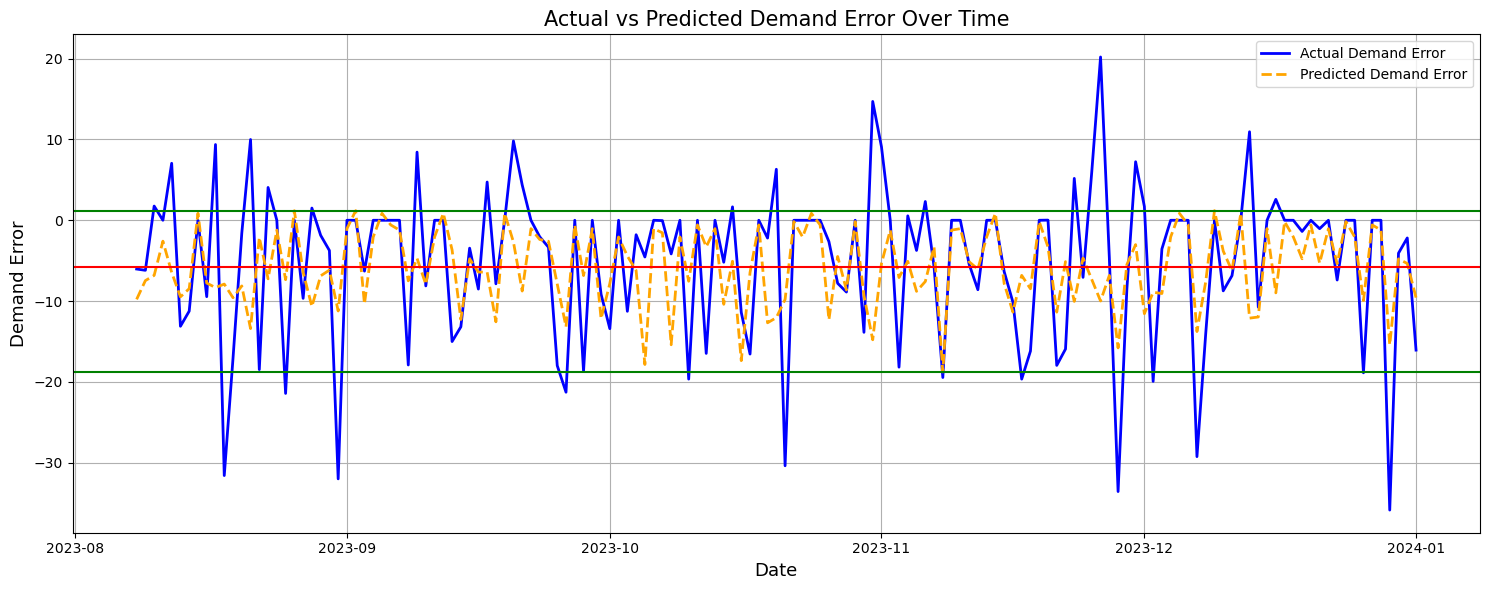

In [31]:
# Plotting clearly over time

plt.figure(figsize=(15, 6))

# Actual demand error (blue solid line)
plt.plot(comparison_df.index, comparison_df['Actual Demand Error'],
         label='Actual Demand Error', color='blue', linewidth=2)

# Predicted demand error (orange dashed line)
plt.plot(comparison_df.index, comparison_df['Predicted Demand Error'],
         label='Predicted Demand Error',
         color='orange', linewidth=2, linestyle='--')

plt.axhline(y = forecast.max(), color = 'g') # plot the mean
plt.axhline(y = forecast.min(), color = 'g') # plot the mean

plt.axhline(y = -5.781712173857287, color = 'r')
# Formatting clearly
plt.xlabel('Date', fontsize=13)
plt.ylabel('Demand Error', fontsize=13)
plt.title('Actual vs Predicted Demand Error Over Time', fontsize=15)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Here we can see that our predictions are actually more tight around the mean without as much noise that would allow us to handle the day-to-day variability of our sales/demand residual. 
We want our predictions to capture this noise so we cn better prepare for errors in the positive direction. If we miss the days where we don't account for the spike in the demand, we are more at risk of understocking and losing sales.

In [32]:
# We are going to scale our predictions to the degree of the actual residual by the mean and std.
new_pred = (forecast - mean)*3 + mean
comparison_df['Scaled Prediction Error'] = new_pred

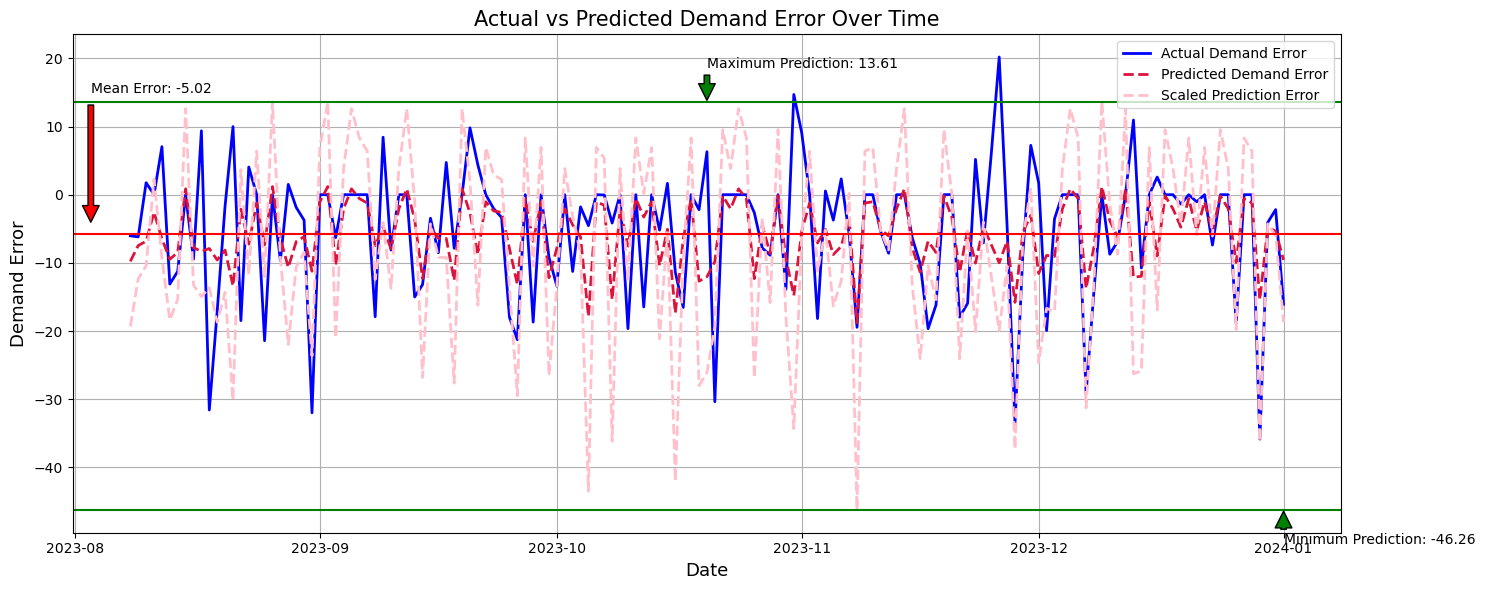

In [34]:
# Plotting clearly over time
plt.figure(figsize=(15, 6))


# Actual demand error (blue solid line)
plt.plot(comparison_df.index, comparison_df['Actual Demand Error'],
         label='Actual Demand Error', color='blue', linewidth=2)

# Predicted demand error (orange dashed line)
plt.plot(comparison_df.index, comparison_df['Predicted Demand Error'],
         label='Predicted Demand Error',
         color='#DC143C', linewidth=2, linestyle='--')

# Predicted demand error (orange dashed line)
plt.plot(comparison_df.index, comparison_df['Scaled Prediction Error'],
         label='Scaled Prediction Error',
         color='pink', linewidth=2, linestyle='--')

plt.axhline(y = -5.781712173857287, color = 'r') # plot the mean

plt.axhline(y = new_pred.max(), color = 'g') # plot the mean
plt.axhline(y = new_pred.min(), color = 'g') # plot the mean

# Add annotations with arrows
# For the mean line
plt.annotate('Mean Error: {:.2f}'.format(mean), 
             xy=(comparison_df.index[0]-pd.Timedelta(days=5), mean),  # Arrow points to this spot
             xytext=(comparison_df.index[0]-pd.Timedelta(days=5), mean+20),  # Text positioned here
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10)

# For the max line
plt.annotate('Maximum Prediction: {:.2f}'.format(new_pred.max()), 
             xy=(comparison_df.index[len(comparison_df)//2], new_pred.max()),  # Arrow points to this spot
             xytext=(comparison_df.index[len(comparison_df)//2], new_pred.max() + 5),  # Text positioned here
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=10)

# For the min line
plt.annotate('Minimum Prediction: {:.2f}'.format(new_pred.min()), 
             xy=(comparison_df.index[-1], new_pred.min()),  # Arrow points to this spot
             xytext=(comparison_df.index[-1], new_pred.min() - 5),  # Text positioned here
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=10)



# Formatting clearly
plt.xlabel('Date', fontsize=13)
plt.ylabel('Demand Error', fontsize=13)
plt.title('Actual vs Predicted Demand Error Over Time', fontsize=15)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**We found that by adding a buffer, nearly all of the points where the demand forecast is under the actual sales are accounted for compared to the unaltered predictions. This would help ensure when we order, we can find points to help us buffer our actual inventory and be in a better position to handle high-sales days.**

### Challenges

8. What challenges did you run into? Do you think it was because of the data, the model, the research question? How would you overcome these challenges? (6pts)

    **A big challenge at the beginning was trying to figure out what data to include in our model. The data was synthetically generated resulting in some columns causing more confusion than necessary. We first wanted to predict inventory levels for a particular product, then extend our findings to all products. We found that the products overlapped in terms of product ID and where they were they were sold. We ended up dropping a lot of the unecessary and redundant columns.**

    **Initially we thought we could do an all encompasing prediction for the entire theoretical company, but realized this wouldn't make sense for all the different stores in different regions with varying product categories. To get a more focused prediction we narrowed it down to store, region and category.**

    **None of our models had a particularly 'good' r-squared values, even after hyperparameter tuning. This could mean that maybe this error isn't possible to predict. There is also the inherent nature of our algorithm. It has built into it that a mean is unchanging and this might not be sufficient enough to represent the sales/demand residual.** 

    **We were finally able to get our model to an R^2 of 0.18 from initially sitting at 0. We still need to find other models that can help explain other aspects of our data, but this was definitely a challenge to get any sort of explainable variance.**

### Research Question Answered, Risks and advantages, consequences, advantages disadvantages

9. Explain how your machine learning solution answers the research question you defined. Describe the risks and advantages of applying your solution to unseen data. What are the consequences of your solution being wrong? What are advantages when it is right?  What are some negative and positive societal impacts from your model? (10pts)
- **By being able to identify when our demand forecast will be under predicting actual sales, we can better adjust ordering and inventory levels.** 

   By being able to identify when our demand forecast will underpredict actual sales, we can better adjust ordering and inventory levels. Our ML solution      helps optimize stock management by analyzing key factors such as seasonality, pricing, promotions, and weather conditions. This ensures that inventory is aligned with actual demand, reducing stockouts and lost sales while minimizing excess inventory costs.

- **Risks and Advantages of Applying the Model to Unseen Data**<br>
    One risk is that the model may not generalize well to new stores, categories, or economic conditions, leading to inaccurate forecasts. External factors like sudden shifts in consumer behavior or supply chain disruptions may not be captured. Also, our model is not so compatible with dealing wiht outliers. However, the advantage is that with continuous learning and retraining, the model can adapt and improve over time, making future predictions more reliable.

- **Consequences of Being Wrong vs. Right**<br>
   If the model is wrong, it could result in overstocking, leading to unnecessary costs, or understocking, losing tons of money and reputation. If correct, it enables precise demand forecasting, reducing waste, optimizing logistics, and improving profits.

-  **Societal Impacts**<br>
   A well-functioning model reduces waste in retail supply chains, benefiting sustainability efforts. However, if biased, it may affect certain regions or consumer groups, leading to uneven product availability. Ensuring fairness and inclusivity in data collection and modeling is crucial for ethical AI deployment.

### Next Research Question

10. Next Research Question. Why is it important? (3pts)

**We would like to extend this model to all categories and all stores. Also, right now we are only looking at clothing sales and forecasted demand. We found that there is are a couple significant indicators like seasonality and price. If we can apply a similar process to other product categories, such as electronics, groceries... etc , we can identify whether these same indicators hold or if different factors drive sales trends in different segments.**

**Furthermore, expanding the model to multiple stores across different regions will help us analyze the impact of geographic and demographic differences on sales. For example, weather conditions may have a larger influence on clothing compared to electronics, while competitor pricing might be a stronger driver for groceries.**


# Model Card
Explore inventory data and determine how to best optimize operational levels. 

## Model Details
- Developed by Felix Zhao, Jack Ko, and Silvano Ross at the University of Washington in IMT 574.
- SARIMAX Model - [Statsmodels SARIMAX](https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html)
- XGBoost Random Forest Regressor - [XGBRFRegressor](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBRFRegressor)

## Intended Use
- Our intended use is to be able to predict the error in demand forecast versus actual sales to help us better manage inventory levels to prevent understocking of items.
- We can use our model to understand when our demand forecast would be within a certain percentage error in actual sales. Further, we could use it to help us anticipate when demand fails to meet actual sales to prevent understocking.
- The users of this model would be managers and inventory specialists in charge of ordering supplies for their stores. 

## Factors

## Training Data
- Since our model uses timeseries we could not perform a standard train-test-split. We had to encompass 80% of our data for training through indexing, then use the remaining part as testing data. We ended up getting rid of features that held too much correlation to each other to prevent data leakage and overfitting.

## Evaluation Data

## Quantitative Analysis
- We used **root-mean-squared error** and **mean absolute error** to evaluate our model performance. 
- We used the **r-squared** metric to determine how much of the variance in our model explains what is actually occurring in the seen data.

### Ethical Considerations
- This model uses no real data and there is no possibility of a HIPPA violation. There are not even real store names or brand name products. The biggest risk to humans would be potential job loss through using this model and getting incorrect predictions on how to adjust inventory. 

### Caveats, Limitations and Recomnendations
- We had issues with getting accurate predictions only to determine that it may be impossible to predict demand forecast error. This made us pivot to try and develop a better buffer to prevent our demand forecast from under stocking and for not over stocking too greatly. 
- The limitations of this model are that it only encompasses one store, in one region for one product.
- Our recomendations would be to extend this framework to all stores, products and regions, in a similar vein to a grid search. We could apply this model framework, then loop through all the different combinations of stores, products and regions, to get models and insights that can be combined together. 
- By creating a combination of individually trained models we can better account for the different processes and buying patterns that exist between regions, stores and products.

#### Used Claude.ai to generate python HTML for the model card from our markdown code

In [42]:
from IPython.display import HTML, display

def create_model_card(
    title="Inventory Optimization Model Card",
    subtitle="Advanced forecasting system for optimizing inventory levels and operational efficiency",
    model_details={
        "authors": "Felix Zhao, Jack Ko, and Silvano Ross at the University of Washington in IMT 574",
        "models": [
            {"name": "SARIMAX Model", "link": "https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html", "description": "for time series forecasting"},
            {"name": "XGBoost Random Forest Regressor", "link": "https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBRFRegressor", "description": "for boosted ensemble learning"},
            {"name": "Sklearn Random Forest Regressor", "link": "https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html", "description": "for standard ensemble learning"}
        ],
        "diagram_path": "./photos/model.png"
    },
    intended_use={
        "points": [
            "Predict the error between demand forecasts and actual sales to optimize inventory management",
            "Identify when demand forecasts are likely to fall within acceptable error margins",
            "Anticipate scenarios where demand fails to meet actual sales",
            "Primary users: Inventory managers and supply chain specialists"
        ],
        "diagram_path": None  # Set to image path when available
    },
    training_data={
        "description": "Due to the time series nature of our analysis, we implemented a chronological data splitting strategy:",
        "points": [
            "The first 80% of chronologically ordered data was designated for model training",
            "Features with high correlation were eliminated to prevent data leakage",
            "Temporal validation was used to ensure the model could generalize to future periods"
        ],
        "diagram_path": './photos/distributions.png'
    },
    # evaluation_data parameter removed
    quantitative_analysis={
        "description": "We employed multiple complementary metrics:",
        "metrics": [
            {"code": "RMSE", "name": "Root Mean Squared Error", "description": "Measures the average magnitude of forecast errors"},
            {"code": "MAE", "name": "Mean Absolute Error", "description": "Quantifies the average absolute difference"},
            {"code": "R²", "name": "R-squared", "description": "Determines the proportion of variance explained"}
        ],
        "diagram_path": './photos/metrics.png'
    },
    ethical_considerations={
        "description": "Our ethical assessment indicates minimal risk as the model:",
        "points": [
            "Uses synthetic data with no personally identifiable information",
            "Contains no real store names or branded product information",
            "Primary human impact: Potential job displacement through automation"
        ]
    },
    limitations={
        "points": [
            "Directly predicting residual was challenging. Using wrong model or it is not predictable.",
            "Current scope is limited to a single store, region, and product category",
            "<strong>Recommended extension:</strong> Implement a grid search-style approach across all stores, products, and regions",
            "A framework of individually trained models would better account for diverse purchasing patterns"
        ],
        "diagram_path": None  # Set to image path when available
    },
    theme_color="#3a6ea5"
):
    """
    Generate HTML for a model card with customizable content, left-aligned.
    
    Parameters:
    -----------
    title : str
        The main title of the model card
    subtitle : str
        The subtitle or description of the model card
    model_details : dict
        Information about the model, authors, and links
    intended_use : dict
        Description of the model's intended use cases
    training_data : dict
        Information about the training data
    quantitative_analysis : dict
        Metrics and analysis information
    ethical_considerations : dict
        Ethical considerations and risks
    limitations : dict
        Model limitations and recommendations
    theme_color : str
        Color theme for headers and accents
        
    Returns:
    --------
    IPython.display.HTML
        HTML display object for the model card
    """
    
    # Helper function to create image or placeholder
    def create_image_or_placeholder(image_path, placeholder_text):
        if image_path:
            return f'<img src="{image_path}" style="width: 100%; height: auto; border-radius: 5px;" alt="{placeholder_text}">'
        else:
            return f'<div style="background-color: #eef1f5; border: 1px dashed #b8c2cc; border-radius: 5px; height: 120px; display: flex; justify-content: center; align-items: center; margin: 10px 0; color: #606f7b; font-style: italic;">{placeholder_text}</div>'
    
    # Create model details content
    models_html = ""
    for model in model_details["models"]:
        models_html += f'<li style="margin-bottom: 8px;"><strong>{model["name"]}</strong> - <a href="{model["link"]}" style="color: {theme_color};">{model["name"].split()[0]}</a> {model["description"]}</li>'
    
    model_details_html = f"""
    <div style="background: #f5f7fa; border: 1px solid #dce1e6; border-radius: 5px; padding: 15px; margin-bottom: 15px; text-align: left;">
        <h2 style="color: {theme_color}; border-bottom: 1px solid {theme_color}; padding-bottom: 8px; margin-top: 0; text-align: left;">Model Details</h2>
        <p style="font-style: italic; color: #555; text-align: left;">{model_details["authors"]}</p>
        <ul style="padding-left: 20px; text-align: left;">
            {models_html}
        </ul>
        {create_image_or_placeholder(model_details["diagram_path"], "Model Architecture Diagram")}
    </div>
    """
    
    # Create intended use content
    intended_use_points = ""
    for point in intended_use["points"]:
        intended_use_points += f'<li style="margin-bottom: 8px; text-align: left;">{point}</li>'
    
    intended_use_html = f"""
    <div style="background: #f5f7fa; border: 1px solid #dce1e6; border-radius: 5px; padding: 15px; margin-bottom: 15px; text-align: left;">
        <h2 style="color: {theme_color}; border-bottom: 1px solid {theme_color}; padding-bottom: 8px; margin-top: 0; text-align: left;">Intended Use</h2>
        <ul style="padding-left: 20px; text-align: left;">
            {intended_use_points}
        </ul>
    </div>
    """
    
    # Create training data content
    training_data_points = ""
    for point in training_data["points"]:
        training_data_points += f'<li style="margin-bottom: 8px; text-align: left;">{point}</li>'
    
    training_data_html = f"""
    <div style="background: #f5f7fa; border: 1px solid #dce1e6; border-radius: 5px; padding: 15px; margin-bottom: 15px; text-align: left;">
        <h2 style="color: {theme_color}; border-bottom: 1px solid {theme_color}; padding-bottom: 8px; margin-top: 0; text-align: left;">Training Data</h2>
        <p style="text-align: left;">{training_data["description"]}</p>
        <ul style="padding-left: 20px; text-align: left;">
            {training_data_points}
        </ul>
        {create_image_or_placeholder(training_data["diagram_path"], "Training Data Visualization")}
    </div>
    """
    
    # Create quantitative analysis content
    metrics_html = ""
    for metric in quantitative_analysis["metrics"]:
        metrics_html += f'<li style="margin-bottom: 8px; text-align: left;"><span style="background-color: #eef1f5; padding: 2px 5px; border-radius: 3px; font-family: monospace; color: #d35400;">{metric["code"]}</span> ({metric["name"]}): {metric["description"]}</li>'
    
    quantitative_analysis_html = f"""
    <div style="background: #f5f7fa; border: 1px solid #dce1e6; border-radius: 5px; padding: 15px; margin-bottom: 15px; text-align: left;">
        <h2 style="color: {theme_color}; border-bottom: 1px solid {theme_color}; padding-bottom: 8px; margin-top: 0; text-align: left;">Quantitative Analysis</h2>
        <p style="text-align: left;">{quantitative_analysis["description"]}</p>
        <ul style="padding-left: 20px; text-align: left;">
            {metrics_html}
        </ul>
        {create_image_or_placeholder(quantitative_analysis["diagram_path"], "Performance Metrics Chart")}
    </div>
    """
    
    # Create ethical considerations content
    ethical_points = ""
    for point in ethical_considerations["points"]:
        ethical_points += f'<li style="margin-bottom: 8px; text-align: left;">{point}</li>'
    
    ethical_considerations_html = f"""
    <div style="background: #f5f7fa; border: 1px solid #dce1e6; border-radius: 5px; padding: 15px; margin-bottom: 15px; text-align: left;">
        <h2 style="color: {theme_color}; border-bottom: 1px solid {theme_color}; padding-bottom: 8px; margin-top: 0; text-align: left;">Ethical Considerations</h2>
        <p style="text-align: left;">{ethical_considerations["description"]}</p>
        <ul style="padding-left: 20px; text-align: left;">
            {ethical_points}
        </ul>
    </div>
    """
    
    # Create limitations content
    limitations_points = ""
    for point in limitations["points"]:
        limitations_points += f'<li style="margin-bottom: 8px; text-align: left;">{point}</li>'
    
    limitations_html = f"""
    <div style="background: #f5f7fa; border: 1px solid #dce1e6; border-radius: 5px; padding: 15px; margin-bottom: 15px; text-align: left;">
        <h2 style="color: {theme_color}; border-bottom: 1px solid {theme_color}; padding-bottom: 8px; margin-top: 0; text-align: left;">Caveats, Limitations and Recommendations</h2>
        <ul style="padding-left: 20px; text-align: left;">
            {limitations_points}
        </ul>
        
    </div>
    """
    
    # Combine all HTML
    html = f"""
    <div style="font-family: Arial, sans-serif; max-width: 950px; margin: 0 auto; padding: 10px; text-align: left;">
        <!-- Header -->
        <div style="background: {theme_color}; color: white; padding: 15px; border-radius: 5px; margin-bottom: 15px; text-align: left;">
            <h1 style="margin: 0; font-size: 24px; text-align: left;">{title}</h1>
            <p style="margin: 8px 0 0; text-align: left;">{subtitle}</p>
        </div>
        
        <!-- Table-based layout -->
        <table style="width: 100%; border-collapse: separate; border-spacing: 10px 0; margin-bottom: 15px; text-align: left;">
            <tr>
                <!-- Left Column -->
                <td style="width: 50%; vertical-align: top; text-align: left;">
                    {model_details_html}
                    {intended_use_html}
                    {training_data_html}
                </td>
                
                <!-- Right Column -->
                <td style="width: 50%; vertical-align: top; text-align: left;">
                    {quantitative_analysis_html}
                    {ethical_considerations_html}
                    {limitations_html}
                </td>
            </tr>
        </table>
    </div>
    """
    
    return HTML(html)

# Example usage
def display_model_card():
    # You can customize any part of the model card by changing parameters
    card = create_model_card()
    display(card)
    
    # If you want to save the HTML to a file for later use
    # with open('model_card.html', 'w') as f:
    #     f.write(card.data)
    
    return card

# display
model_card = display_model_card()

"Model Details Felix Zhao, Jack Ko, and Silvano Ross at the University of Washington in IMT 574 SARIMAX Model - SARIMAX for time series forecastingXGBoost Random Forest Regressor - XGBoost for boosted ensemble learningSklearn Random Forest Regressor - Sklearn for standard ensemble learning Intended Use Predict the error between demand forecasts and actual sales to optimize inventory managementIdentify when demand forecasts are likely to fall within acceptable error marginsAnticipate scenarios where demand fails to meet actual salesPrimary users: Inventory managers and supply chain specialists Training Data Due to the time series nature of our analysis, we implemented a chronological data splitting strategy: The first 80% of chronologically ordered data was designated for model trainingFeatures with high correlation were eliminated to prevent data leakageTemporal validation was used to ensure the model could generalize to future periods","Quantitative Analysis We employed multiple complementary metrics: RMSE (Root Mean Squared Error): Measures the average magnitude of forecast errorsMAE (Mean Absolute Error): Quantifies the average absolute differenceR² (R-squared): Determines the proportion of variance explained Ethical Considerations Our ethical assessment indicates minimal risk as the model: Uses synthetic data with no personally identifiable informationContains no real store names or branded product informationPrimary human impact: Potential job displacement through automation Caveats, Limitations and Recommendations Directly predicting residual was challenging. Using wrong model or it is not predictable.Current scope is limited to a single store, region, and product categoryRecommended extension: Implement a grid search-style approach across all stores, products, and regionsA framework of individually trained models would better account for diverse purchasing patterns"
